In [1]:
import gzip
import pickle 
import mplhep as hep
hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=15)
import numpy as np
import torch 
import dgl
import pandas as pd
import numpy as np
import plotly.express as px
import sys
sys.path.append("/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/")
from sklearn.cluster import DBSCAN
#from torch_scatter import scatter_max, scatter_add, scatter_mean
# from src.layers.inference_oc import get_clustering, obtain_intersection_values
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt

/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.utils.inference.pandas_helpers import open_mlpf_dataframe
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_DBSCAN_v2.pt"
sd_hgb, matched_hgb = open_mlpf_dataframe(path_hgcal, False)

path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_hdbscan_v3_min_cluster_size_4.pt"
sd_ct, matched_hgb = open_mlpf_dataframe(path_hgcal, False)

from src.utils.inference.pandas_helpers import open_mlpf_dataframe
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/281124/showers_df_evaluation/0_0_0_Ztt_12_5k_12_8k_0312.pt"
sd_hgb1, matched_hgb = open_mlpf_dataframe(path_hgcal, False)

path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/281124/showers_df_evaluation/0_0_1_Ztt_12_5k_12_8k_0312.pt"
sd_ct1, matched_hgb = open_mlpf_dataframe(path_hgcal, False)

In [3]:
from src.evaluation.CLD_eval import create_eff_main
eff_dict_oc = create_eff_main(sd_hgb)
eff_dict_ct = create_eff_main(sd_ct)
eff_dict_oc1 = create_eff_main(sd_hgb1)
eff_dict_ct1 = create_eff_main(sd_ct1)

(61,) (61,)
(61,) (61,)
(60,) (60,)
(60,) (60,)


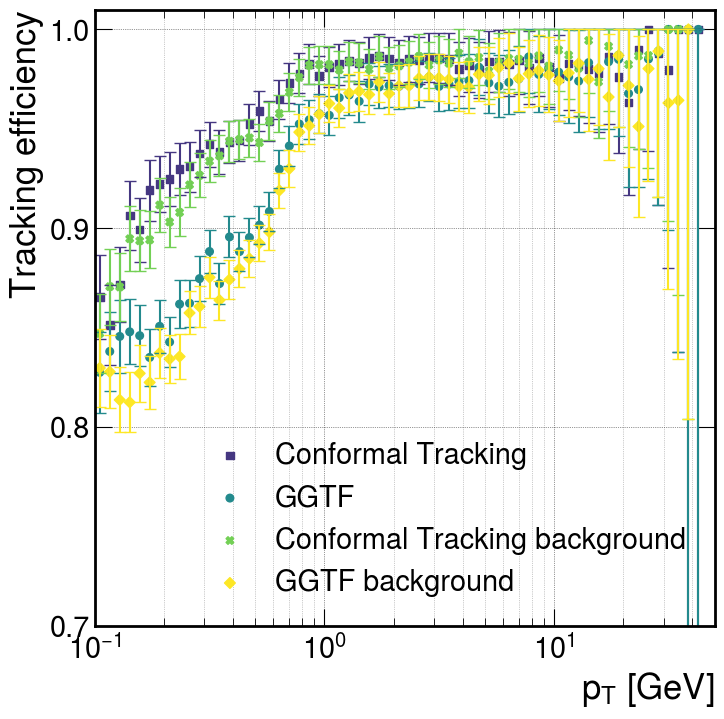

In [4]:
def limit_error_bars(y, yerr, upper_limit=1):
    yerr_upper = np.minimum(y + yerr, upper_limit) - y
    yerr_lower = yerr  # Lower error bars remain unchanged
    return yerr_lower, yerr_upper
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8, 8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = ["#453781FF",  "#238A8DFF", "#73D055FF", "#FDE725FF"]
marker = ["s", "o", "X", "D"]
labels = ["Conformal Tracking", "GGTF", "Conformal Tracking background", "GGTF background"]
dataframe_list = [eff_dict_ct, eff_dict_oc, eff_dict_ct1, eff_dict_oc1]
i =0 
log = True
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    print(np.array(dataframe_list[i]["energy_eff"]).shape,  np.array(dataframe_list[i]["eff_def1"]).shape)
    plt.scatter(
        np.array(dataframe_list[i]["energy_eff"]),
        np.array(dataframe_list[i]["eff_def1"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors_def1"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff_def1"]), np.array(error_y)/2, upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["eff_def1"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)

if log:
    log_ = "log"
    plt.xscale("log")
else:
    log_ = ""
# plt.title("CLD")
plt.legend(loc="lower right") #,title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r"$10< \theta< 170$" "\n" r"$\textrm{vertex } R<50\textrm{ mm}$" "\n" r"$\Delta_{MC}>0.02 \textrm{ rad}$")

# vertex R<50mm, \Delta_{MC}>0.02 rad
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.minorticks_on()
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# plt.grid(True, which="minor")
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.xlim([1e-1,50])
plt.ylim([0.7,1.01])
plt.rcParams['text.usetex'] = True
size_font = 25
# plt.axvline(x=0.77)
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 25
leg = ax.get_legend()
leg._legend_box.align = "left"

(61,) (61,)
(61,) (61,)
(60,) (60,)
(60,) (60,)


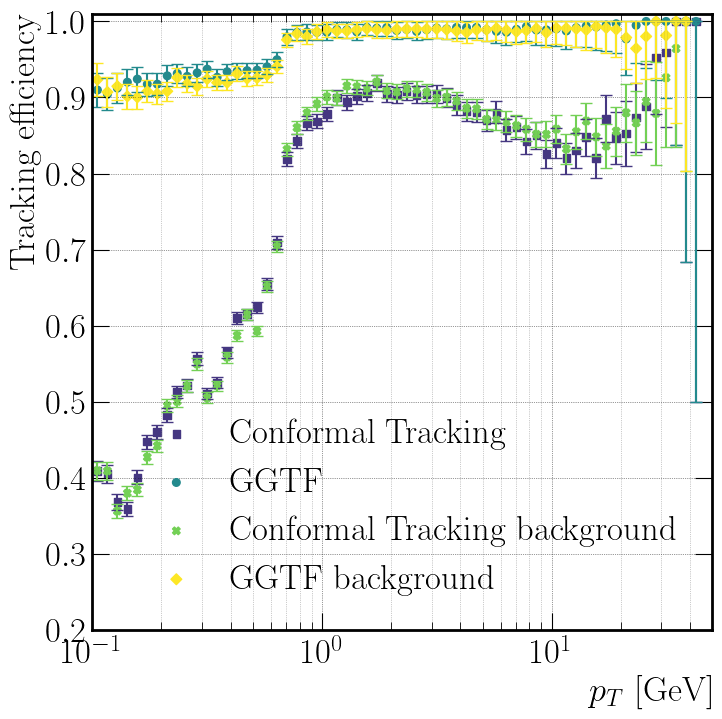

In [5]:
def limit_error_bars(y, yerr, upper_limit=1):
    yerr_upper = np.minimum(y + yerr, upper_limit) - y
    yerr_lower = yerr  # Lower error bars remain unchanged
    return yerr_lower, yerr_upper
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8, 8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = ["#453781FF",  "#238A8DFF", "#73D055FF", "#FDE725FF"]
marker = ["s", "o", "X", "D"]
labels = ["Conformal Tracking", "GGTF", "Conformal Tracking background", "GGTF background"]
dataframe_list = [eff_dict_ct, eff_dict_oc, eff_dict_ct1, eff_dict_oc1]
i =0 
log = True
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    print(np.array(dataframe_list[i]["energy_eff"]).shape,  np.array(dataframe_list[i]["eff"]).shape)
    plt.scatter(
        np.array(dataframe_list[i]["energy_eff"]),
        np.array(dataframe_list[i]["eff"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff"]), np.array(error_y)/2, upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["eff"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)

if log:
    log_ = "log"
    plt.xscale("log")
else:
    log_ = ""
# plt.title("CLD")
plt.legend(loc="lower right") #,title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r"$10< \theta< 170$" "\n" r"$\textrm{vertex } R<50\textrm{ mm}$" "\n" r"$\Delta_{MC}>0.02 \textrm{ rad}$")

# vertex R<50mm, \Delta_{MC}>0.02 rad
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.minorticks_on()
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# plt.grid(True, which="minor")
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.xlim([1e-1,50])
plt.ylim([0.2,1.01])
plt.rcParams['text.usetex'] = True
size_font = 25
# plt.axvline(x=0.77)
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 25
leg = ax.get_legend()
leg._legend_box.align = "left"

0.7501818465215359 0.22070322647685353 2.597807450511768e-05 0.00047409985971839767 0.028614849067387125
0.96578687587676 0.01702862783810464 0.0047474931158102565 0.0010391229802047073 0.011397880189120382


<Figure size 800x800 with 0 Axes>

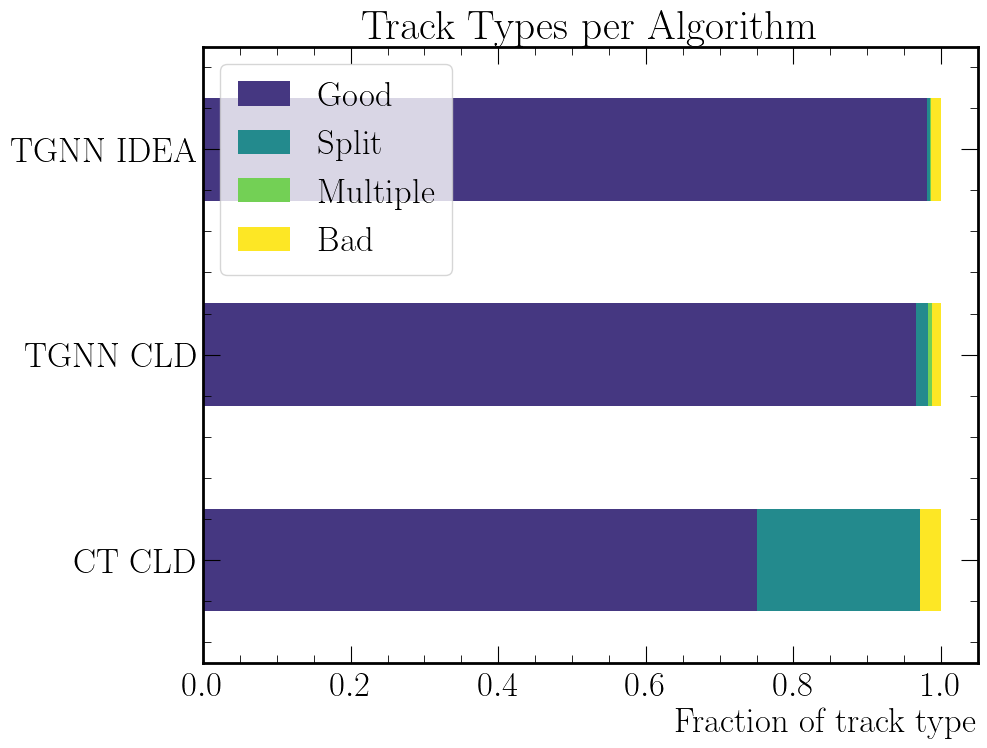

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from src.evaluation.CLD_eval import calculate_splits
# Example DataFrame structure (you should replace this with your actual data)
data = calculate_splits(sd_ct, sd_hgb)

df = pd.DataFrame(data)
my_colors = [ "#810f7c","#8856a7","#8c96c6", "#b3cde3",   "#edf8fb"]
my_colors = ["#808080","#191919", "#bbbbbb", "#ff0000", "#f28686"]
my_colors = ["#453781FF",  "#238A8DFF", "#73D055FF", "#FDE725FF"]
# Set 'Algorithm' as index
df.set_index('Algorithm', inplace=True)

# Plot
fig= plt.figure( figsize=(8, 8))
# ax = fig.add_subplot(111)
ax = df.plot(kind='barh', stacked=True, figsize=(10, 8), color=my_colors)
# Labels and title
ax.set_xlabel('Fraction of track type')
ax.set_ylabel('')
ax.set_title('Track Types per Algorithm')

# Show legend at a specific location
plt.legend(loc='upper left',  framealpha=1, edgecolor='black')
legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rcParams['text.usetex'] = True
size_font = 25
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 20
plt.show()

In [7]:
more_than_4_hits = sd_hgb["pred_showers_E"]>3
print(np.sum(np.isnan(sd_hgb["reco_showers_E"][more_than_4_hits].values))/np.sum(~np.isnan(sd_hgb["reco_showers_E"][more_than_4_hits].values))*100)
more_than_4_hits = sd_ct["pred_showers_E"]>3
print(np.sum(np.isnan(sd_ct["reco_showers_E"][more_than_4_hits].values))/np.sum(~np.isnan(sd_ct["reco_showers_E"][more_than_4_hits].values))*100)


more_than_4_hits = sd_hgb1["pred_showers_E"]>3
print(np.sum(np.isnan(sd_hgb1["reco_showers_E"][more_than_4_hits].values))/np.sum(~np.isnan(sd_hgb1["reco_showers_E"][more_than_4_hits].values))*100)
more_than_4_hits = sd_ct1["pred_showers_E"]>3
print(np.sum(np.isnan(sd_ct1["reco_showers_E"][more_than_4_hits].values))/np.sum(~np.isnan(sd_ct1["reco_showers_E"][more_than_4_hits].values))*100)

4.801220813817072
5.454859827571815
5.372979237855445
5.472359110940997


(0.0, 40.0)

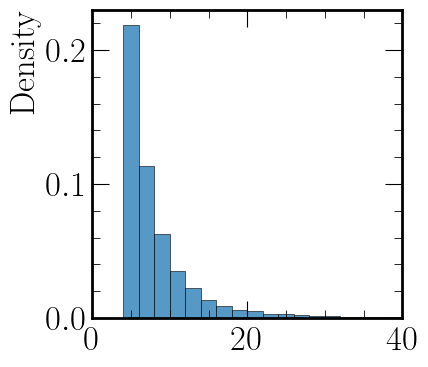

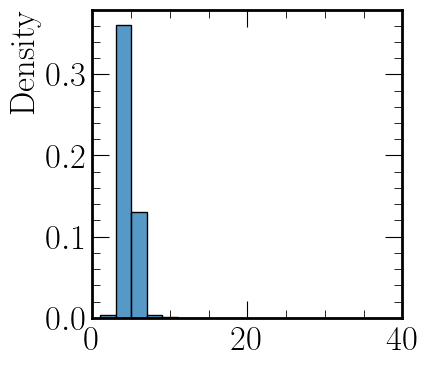

In [31]:
number_of_hits_fake_tracks = sd_hgb[np.isnan(sd_hgb["reco_showers_E"])].pred_showers_E.values
import seaborn as sns
plt.figure(figsize=(4,4))
sns.histplot(number_of_hits_fake_tracks, binwidth=2, stat="density")
plt.xlim([0,40])

number_of_hits_fake_tracks_ct = sd_ct[np.isnan(sd_ct["reco_showers_E"])].pred_showers_E.values
plt.figure(figsize=(4,4))
sns.histplot(number_of_hits_fake_tracks_ct, binwidth=2, stat="density")
plt.xlim([0,40])

# the only way to determine how bad the fake problem is would be to calculate the chi square of these tracks 

In [18]:
## evaluation of the fakes:
more_than_4_hits = sd_hgb["pred_showers_E"]>3
percentage_of_fakes = np.sum(np.isnan(sd_hgb["reco_showers_E"][more_than_4_hits].values))/np.sum(~np.isnan(sd_hgb["reco_showers_E"][more_than_4_hits].values))*100
print(np.sum(np.isnan(sd_hgb["reco_showers_E"][more_than_4_hits].values)),np.sum(~np.isnan(sd_hgb["reco_showers_E"][more_than_4_hits].values)))

56214 266715


In [18]:
# eff_dict_ct = create_eff_dic(reconstructable_ct,reco_R_ct,reco_delta_plot)
# eff_dict_ct_all_p = create_eff_dic(reconstructable_ct_all_p,reco_R_ct,reco_delta_plot)

In [19]:
# eff_dict_ml = create_eff_dic(reconstructable_ml,reco_R_ml,reco_delta_plot_ml)
# eff_dict_ml_all_p = create_eff_dic(reconstructable_ml_all_p,reco_R_ml,reco_delta_plot_ml)

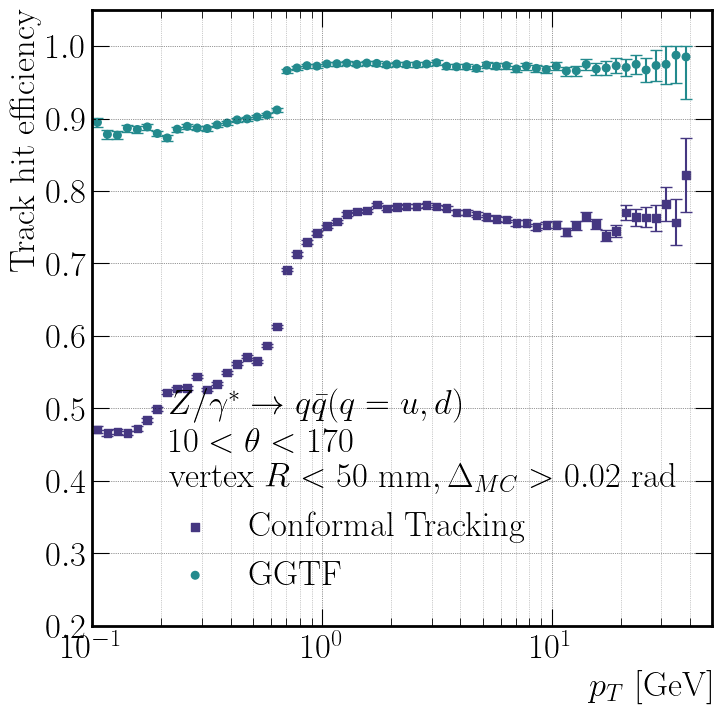

In [13]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8, 8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
colors = ["#453781FF",  "#238A8DFF", "#73D055FF", "#FDE725FF"]
index = 0
j = 0
colors = ["r", "b"]
colors = ["#453781FF",  "#238A8DFF", "#73D055FF", "#FDE725FF"]
marker = ["s", "o"]
labels = ["Conformal Tracking", "GGTF"]
dataframe_list = [eff_dict_ct, eff_dict_oc]
i =0 
log = True
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Track hit efficiency")

for i in range(0, len(dataframe_list)):
    plt.scatter(
        np.array(dataframe_list[i]["energy_eff"]),
        np.array(dataframe_list[i]["number_of_hits"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["number_of_hits"]))],
        s=30,
    )
    error_y = dataframe_list[i]["number_of_hits_var"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["number_of_hits"]), np.array(error_y)/2, upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["number_of_hits"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)

if log:
    log_ = "log"
    plt.xscale("log")
else:
    log_ = ""
# plt.title("CLD")
plt.legend(loc="lower right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r"$10<\theta< 170$" "\n" r"$\textrm{vertex } R<50 \textrm{ mm}, \Delta_{MC}>0.02 \textrm{ rad}$")


ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# plt.grid(True, which="minor")
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.xlim([1e-1,50])
plt.ylim([0.2,1.05])
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] =size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 25
leg = ax.get_legend()
leg._legend_box.align = "left"

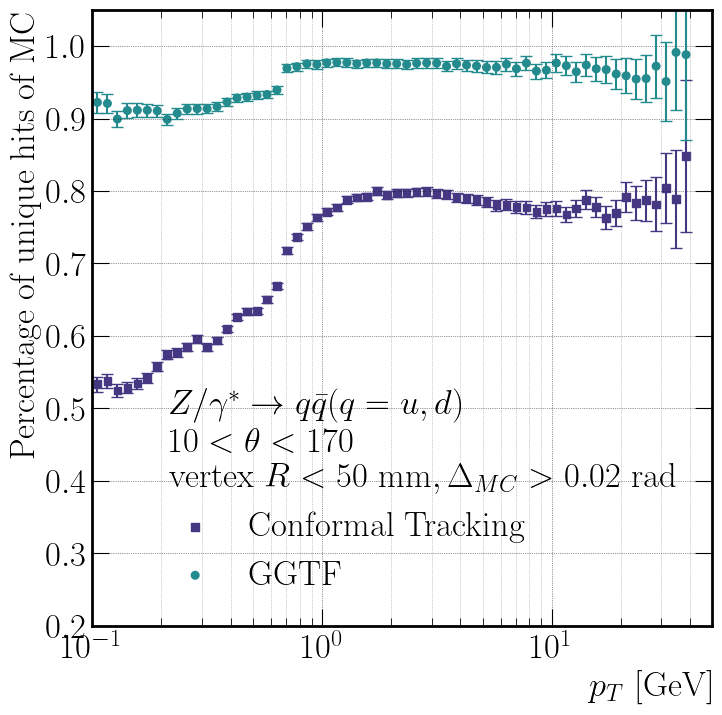

In [14]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8, 8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = ["r", "b"]
colors = ["#453781FF",  "#238A8DFF", "#73D055FF", "#FDE725FF"]
marker = ["s", "o"]
labels = ["Conformal Tracking", "GGTF"]
dataframe_list = [eff_dict_ct, eff_dict_oc]
i =0 
log = True
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Percentage of unique hits of MC")

for i in range(0, len(dataframe_list)):
    plt.scatter(
        np.array(dataframe_list[i]["energy_eff"]),
        np.array(dataframe_list[i]["number_of_hits_unique"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["number_of_hits_unique"]))],
        s=30,
    )
    error_y = dataframe_list[i]["number_of_hits_var_unique"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["number_of_hits_unique"]), np.array(error_y)/2, upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["number_of_hits_unique"] ,yerr= error_y, ecolor=colors[i], linestyle='none', capsize=4)

if log:
    log_ = "log"
    plt.xscale("log")
else:
    log_ = ""
# plt.title("CLD")
plt.legend(loc="lower right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r"$ 10<\theta< 170$" "\n" r"$\textrm{vertex } R<50 \textrm{ mm}, \Delta_{MC}>0.02 \textrm{ rad}$")


ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# plt.grid(True, which="minor")
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.xlim([1e-1,50])
plt.ylim([0.2,1.05])
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 25
leg = ax.get_legend()
leg._legend_box.align = "left"

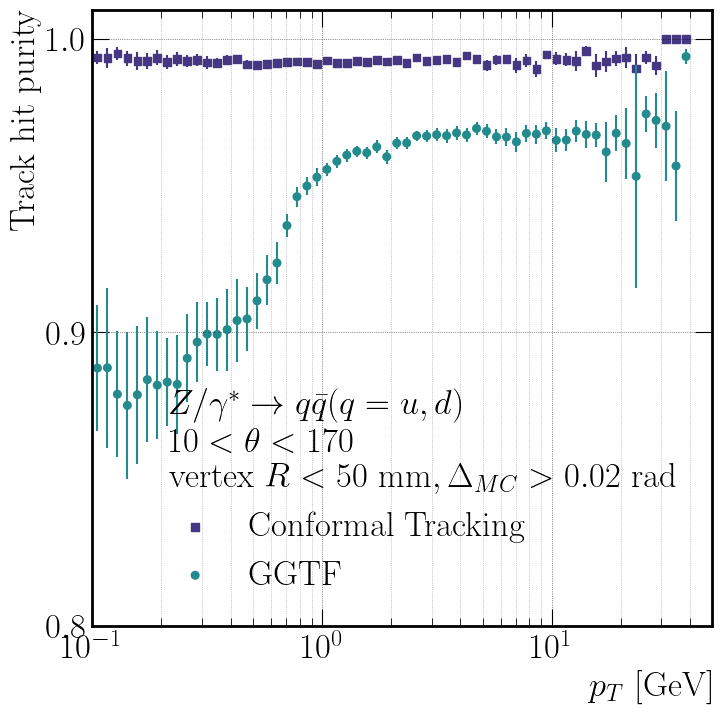

In [15]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8, 8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]

index = 0
j = 0
colors = ["r", "b"]
colors = ["#453781FF",  "#238A8DFF", "#73D055FF", "#FDE725FF"]
marker = ["s", "o"]
labels = ["Conformal Tracking", "GGTF"]
dataframe_list = [eff_dict_ct, eff_dict_oc]
i =0 
log = True
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Track hit purity")

for i in range(0, len(dataframe_list)):
    plt.scatter(
        np.array(dataframe_list[i]["energy_eff"]),
        np.array(dataframe_list[i]["purity"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["purity"]))],
        s=30,
    )
    error_y = dataframe_list[i]["purity_var"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["purity"]), np.array(error_y), upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["purity"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none')

if log:
    log_ = "log"
    plt.xscale("log")
else:
    log_ = ""
plt.legend(loc="lower right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r"$10< \theta< 170$" "\n" r"$\textrm{vertex } R<50 \textrm{ mm}, \Delta_{MC}>0.02 \textrm{ rad}$")


ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# plt.grid(True, which="minor")
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.xlim([1e-1,50])
plt.ylim([0.8,1.01])
plt.rcParams['text.usetex'] = True
size_font = 25
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 25
leg = ax.get_legend()
leg._legend_box.align = "left"

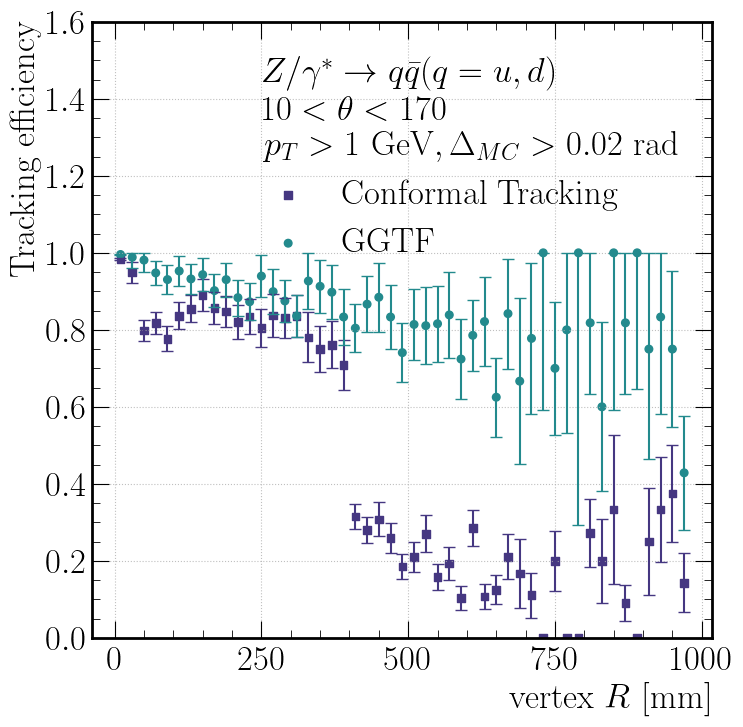

In [16]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8, 8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = ["r", "b"]
colors = ["#453781FF",  "#238A8DFF", "#73D055FF", "#FDE725FF"]
marker = ["s", "o"]
labels = ["Conformal Tracking", "GGTF"]
dataframe_list = [eff_dict_ct, eff_dict_oc]
i =0 
log = True
plt.xlabel(r"$\textrm{vertex } R$ [mm]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    plt.scatter(
        np.array(dataframe_list[i]["energy_v"]),
        np.array(dataframe_list[i]["eff_v"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff_v"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors_v"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff_v"]), np.array(error_y)/2, upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_v"], dataframe_list[i]["eff_v"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)


# plt.title("CLD")
plt.legend(loc="upper right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r"$10< \theta< 170 $" "\n" r"$p_T>1 \textrm{ GeV}, \Delta_{MC}>0.02 \textrm{ rad}$")


# ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
# ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
# ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
# ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.grid(True)
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
# plt.xlim([1e-1,50])
plt.ylim([0,1.6])
size_font  = 25
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 25
leg = ax.get_legend()
leg._legend_box.align = "left"

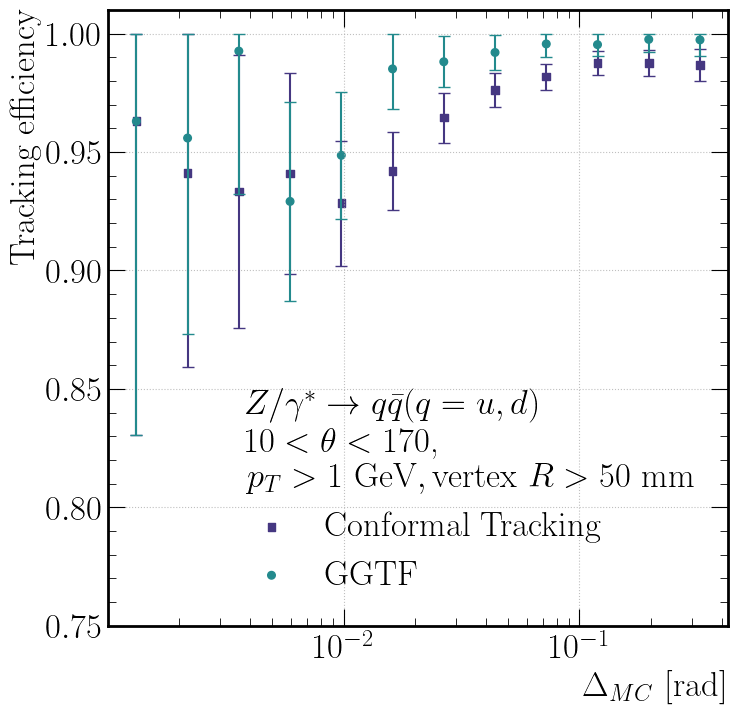

In [17]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8, 8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = ["r", "b"]
colors = ["#453781FF",  "#238A8DFF", "#73D055FF", "#FDE725FF"]
marker = ["s", "o"]
labels = ["Conformal Tracking", "GGTF"]
dataframe_list = [eff_dict_ct, eff_dict_oc]
i =0 
log = True
plt.xlabel(r"$\Delta_{MC}$ [rad]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    plt.scatter(
        np.array(dataframe_list[i]["delta_MC_values"]),
        np.array(dataframe_list[i]["eff_delta_MC"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff_delta_MC"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors_delta_mc"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff_delta_MC"]), np.array(error_y)/2, upper_limit=1)
    plt.errorbar(dataframe_list[i]["delta_MC_values"], dataframe_list[i]["eff_delta_MC"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)


# plt.title("CLD")
plt.legend(loc="lower right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r'$10< \theta< 170$,' "\n" r"$p_T>1 \textrm{ GeV}, \textrm{vertex } R>50 \textrm{ mm}$")
plt.xscale("log")
# ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
# ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
# ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
# ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.grid(True)
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
# plt.xlim([1e-1,50])
plt.ylim([0.75,1.01])
size_font  = 25
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 25
leg = ax.get_legend()
leg._legend_box.align = "left"